In [24]:
from prophet import Prophet
import pandas as pd

In [25]:
s=pd.read_csv(r"C:\Users\prernagupta\Desktop\skinny\skinny.csv")


In [26]:
s

,TREND,BASE,ds,y,NSI,FSI_YHAT_LOWER,FSI_YHAT,FSI_YHAT_UPPER,NSI_YHAT_LOWER,NSI_YHAT,...,CATWALK_IMPACT,FSI_PIVOT_POINTS,NSI_PIVOT_POINTS,CREATED_AT,CREATED_BY,LEVELS,REGION,INNOVATOR_SMOOTHED_DATA,MASS_SMOOTHED_DATA,CONSERVATIVE_SMOOTHED_DATA
0,Skinny Jeans Uk,Jeans,02/01/2017,0.449318,0.452593,0.442415,0.455360,0.468650,0.453975,0.475918,...,0.0,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
1,Skinny Jeans Uk,Jeans,09/01/2017,0.455947,0.449564,0.441594,0.454605,0.467843,0.450918,0.470247,...,0.0,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
2,Skinny Jeans Uk,Jeans,16/01/2017,0.453333,0.447400,0.440145,0.454546,0.468040,0.443109,0.465064,...,0.0,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
3,Skinny Jeans Uk,Jeans,23/01/2017,0.454816,0.445920,0.441777,0.454946,0.467913,0.438970,0.460818,...,0.0,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
4,Skinny Jeans Uk,Jeans,30/01/2017,0.454797,0.444945,0.441414,0.455451,0.468276,0.435966,0.457671,...,0.0,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Skinny Jeans Uk,Jeans,23/10/2023,NaN,NaN,0.223999,0.240615,0.256026,0.190513,0.214161,...,NaN,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
356,Skinny Jeans Uk,Jeans,30/10/2023,NaN,NaN,0.224174,0.241443,0.257313,0.188585,0.212258,...,NaN,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
357,Skinny Jeans Uk,Jeans,06/11/2023,NaN,NaN,0.225642,0.242800,0.258353,0.186769,0.210463,...,NaN,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
s['ds']= pd.to_datetime(s['ds'])
q=s
df_train = q.loc[q["ds"]<="2021-11-22"]
df_test  = q.loc[q["ds"]>="2021-11-22"]

In [28]:
s.columns

Index(['TREND', 'BASE', 'ds', 'y', 'NSI', 'FSI_YHAT_LOWER', 'FSI_YHAT',
       'FSI_YHAT_UPPER', 'NSI_YHAT_LOWER', 'NSI_YHAT', 'NSI_YHAT_UPPER',
       'FRESHNESS_INDEX', 'MARKDOWN_INDEX', 'FASHION_LEADERS_INDEX',
       'TRENDING_INDEX', 'CATWALK_IMPACT', 'FSI_PIVOT_POINTS',
       'NSI_PIVOT_POINTS', 'CREATED_AT', 'CREATED_BY', 'LEVELS', 'REGION',
       'INNOVATOR_SMOOTHED_DATA', 'MASS_SMOOTHED_DATA',
       'CONSERVATIVE_SMOOTHED_DATA'],
      dtype='object')

In [29]:
df_train

,TREND,BASE,ds,y,NSI,FSI_YHAT_LOWER,FSI_YHAT,FSI_YHAT_UPPER,NSI_YHAT_LOWER,NSI_YHAT,...,CATWALK_IMPACT,FSI_PIVOT_POINTS,NSI_PIVOT_POINTS,CREATED_AT,CREATED_BY,LEVELS,REGION,INNOVATOR_SMOOTHED_DATA,MASS_SMOOTHED_DATA,CONSERVATIVE_SMOOTHED_DATA
0,Skinny Jeans Uk,Jeans,2017-02-01,0.449318,0.452593,0.442415,0.455360,0.468650,0.453975,0.475918,...,0.000000,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
1,Skinny Jeans Uk,Jeans,2017-09-01,0.455947,0.449564,0.441594,0.454605,0.467843,0.450918,0.470247,...,0.000000,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
2,Skinny Jeans Uk,Jeans,2017-01-16,0.453333,0.447400,0.440145,0.454546,0.468040,0.443109,0.465064,...,0.000000,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
3,Skinny Jeans Uk,Jeans,2017-01-23,0.454816,0.445920,0.441777,0.454946,0.467913,0.438970,0.460818,...,0.000000,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
4,Skinny Jeans Uk,Jeans,2017-01-30,0.454797,0.444945,0.441414,0.455451,0.468276,0.435966,0.457671,...,0.000000,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Skinny Jeans Uk,Jeans,2021-01-11,0.318544,0.291889,0.316290,0.329755,0.342630,0.289718,0.311703,...,0.961200,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
253,Skinny Jeans Uk,Jeans,2021-08-11,0.317789,0.274917,0.318624,0.331180,0.345237,0.288665,0.310011,...,0.967996,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
254,Skinny Jeans Uk,Jeans,2021-11-15,0.341249,0.252681,0.319259,0.332414,0.346016,0.285580,0.308649,...,0.967025,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
255,Skinny Jeans Uk,Jeans,2021-11-22,0.348072,0.224629,0.319651,0.332950,0.346331,0.284264,0.307467,...,0.960229,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN


In [30]:
df_test

,TREND,BASE,ds,y,NSI,FSI_YHAT_LOWER,FSI_YHAT,FSI_YHAT_UPPER,NSI_YHAT_LOWER,NSI_YHAT,...,CATWALK_IMPACT,FSI_PIVOT_POINTS,NSI_PIVOT_POINTS,CREATED_AT,CREATED_BY,LEVELS,REGION,INNOVATOR_SMOOTHED_DATA,MASS_SMOOTHED_DATA,CONSERVATIVE_SMOOTHED_DATA
223,Skinny Jeans Uk,Jeans,2021-12-04,0.360652,0.304164,0.337711,0.350796,0.364307,0.269953,0.292341,...,0.983884,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
236,Skinny Jeans Uk,Jeans,2021-12-07,0.338114,0.301402,0.318642,0.331557,0.344966,0.280942,0.302295,...,0.783784,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
255,Skinny Jeans Uk,Jeans,2021-11-22,0.348072,0.224629,0.319651,0.332950,0.346331,0.284264,0.307467,...,0.960229,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
256,Skinny Jeans Uk,Jeans,2021-11-29,NaN,NaN,0.320303,0.332471,0.345970,0.284078,0.306092,...,0.953433,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
258,Skinny Jeans Uk,Jeans,2021-12-13,NaN,NaN,0.315128,0.328595,0.342660,0.278399,0.300959,...,0.939146,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Skinny Jeans Uk,Jeans,2023-09-10,NaN,NaN,0.225565,0.241632,0.257204,0.194687,0.216730,...,NaN,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
354,Skinny Jeans Uk,Jeans,2023-10-16,NaN,NaN,0.223824,0.240658,0.256777,0.193454,0.215789,...,NaN,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
355,Skinny Jeans Uk,Jeans,2023-10-23,NaN,NaN,0.223999,0.240615,0.256026,0.190513,0.214161,...,NaN,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
356,Skinny Jeans Uk,Jeans,2023-10-30,NaN,NaN,0.224174,0.241443,0.257313,0.188585,0.212258,...,NaN,['2017-01-09'],['2017-01-09'],39:04.2,camillereyes,Style,UK,NaN,NaN,NaN


In [39]:

m = Prophet( changepoint_range=1.0 ,changepoint_prior_scale=0.05)
d=df_train
u=[]
if d['y'].corr(d['FRESHNESS_INDEX'])>0:
    m.add_regressor('FRESHNESS_INDEX')
if d['y'].corr(d['MARKDOWN_INDEX'])<0:
    m.add_regressor('MARKDOWN_INDEX')
if d['y'].corr(d['FASHION_LEADERS_INDEX'])>0:
     m.add_regressor('FASHION_LEADERS_INDEX')
if d['y'].corr(d['TRENDING_INDEX'])>0:
    m.add_regressor('TRENDING_INDEX')
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


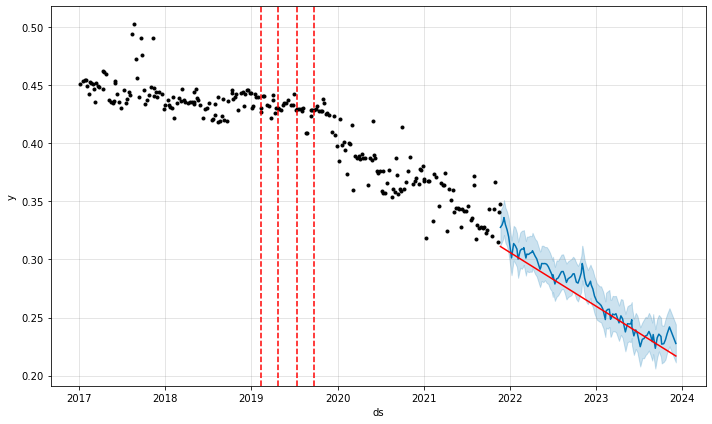

In [40]:
forecast = m.predict(df_test.drop(columns="y"))
#prop only uses weekly seasonlity, and change points for first 80%

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:prophet:Making 4 forecasts with cutoffs between 2019-06-01 00:00:00 and 2020-11-22 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

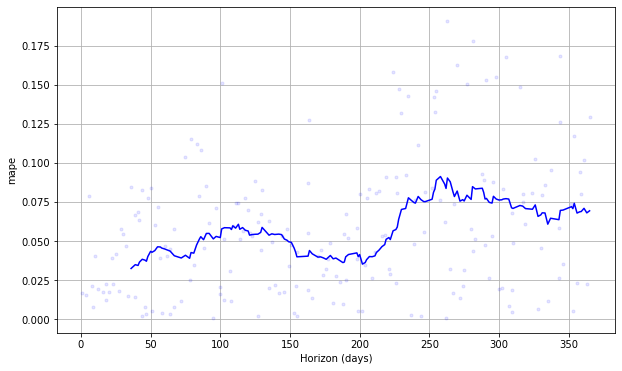

In [41]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [42]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,0.000245,0.015656,0.012946,0.032378,0.021663,0.032811,0.65
1,39 days,0.000276,0.016610,0.013893,0.034829,0.022378,0.035136,0.60
2,41 days,0.000253,0.015919,0.013509,0.034323,0.022378,0.034590,0.60
3,42 days,0.000278,0.016666,0.014288,0.036447,0.030728,0.036807,0.55
4,44 days,0.000307,0.017534,0.014834,0.038270,0.030728,0.038506,0.55
